# Libraries

In [1]:
import pandas as pd
import numpy as np
import datasets as ds
from datasets import load_dataset
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

# Loading Dataset

In [2]:
df = pd.read_csv("data_jobs.csv")

## View First 5 Rows

In [3]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


## Cleanup

In [4]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


---

# Exploratory Data Analysis for all Data Roles

## Roles To Explore

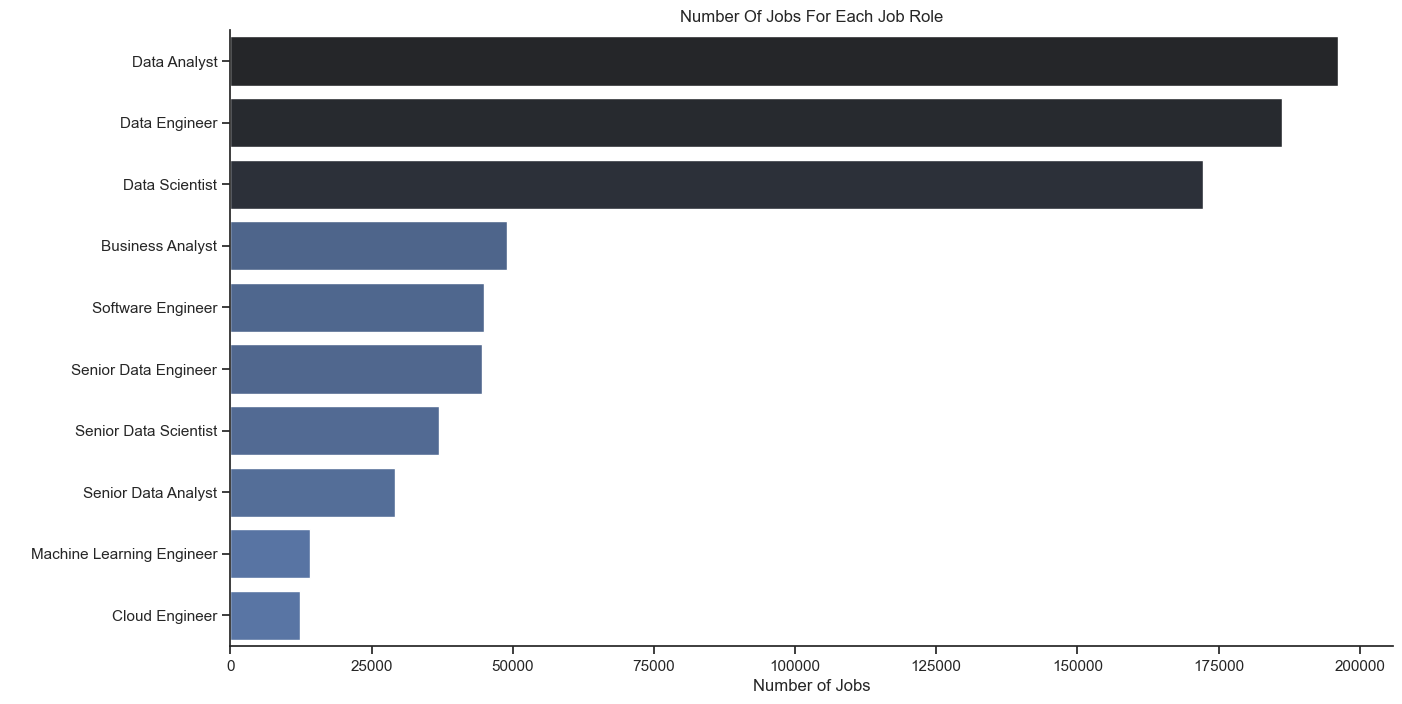

In [6]:
df_plot = df["job_title_short"].value_counts().to_frame()

plt.figure(figsize=(15, 8))

sns.set_theme(style="ticks")
sns.barplot(df_plot, x='count', y='job_title_short', hue='count', palette='dark:b_r', legend=False)
sns.despine()

plt.title("Number Of Jobs For Each Job Role")
plt.xlabel("Number of Jobs")
plt.ylabel(" ")
plt.show()

## Countries To Explore

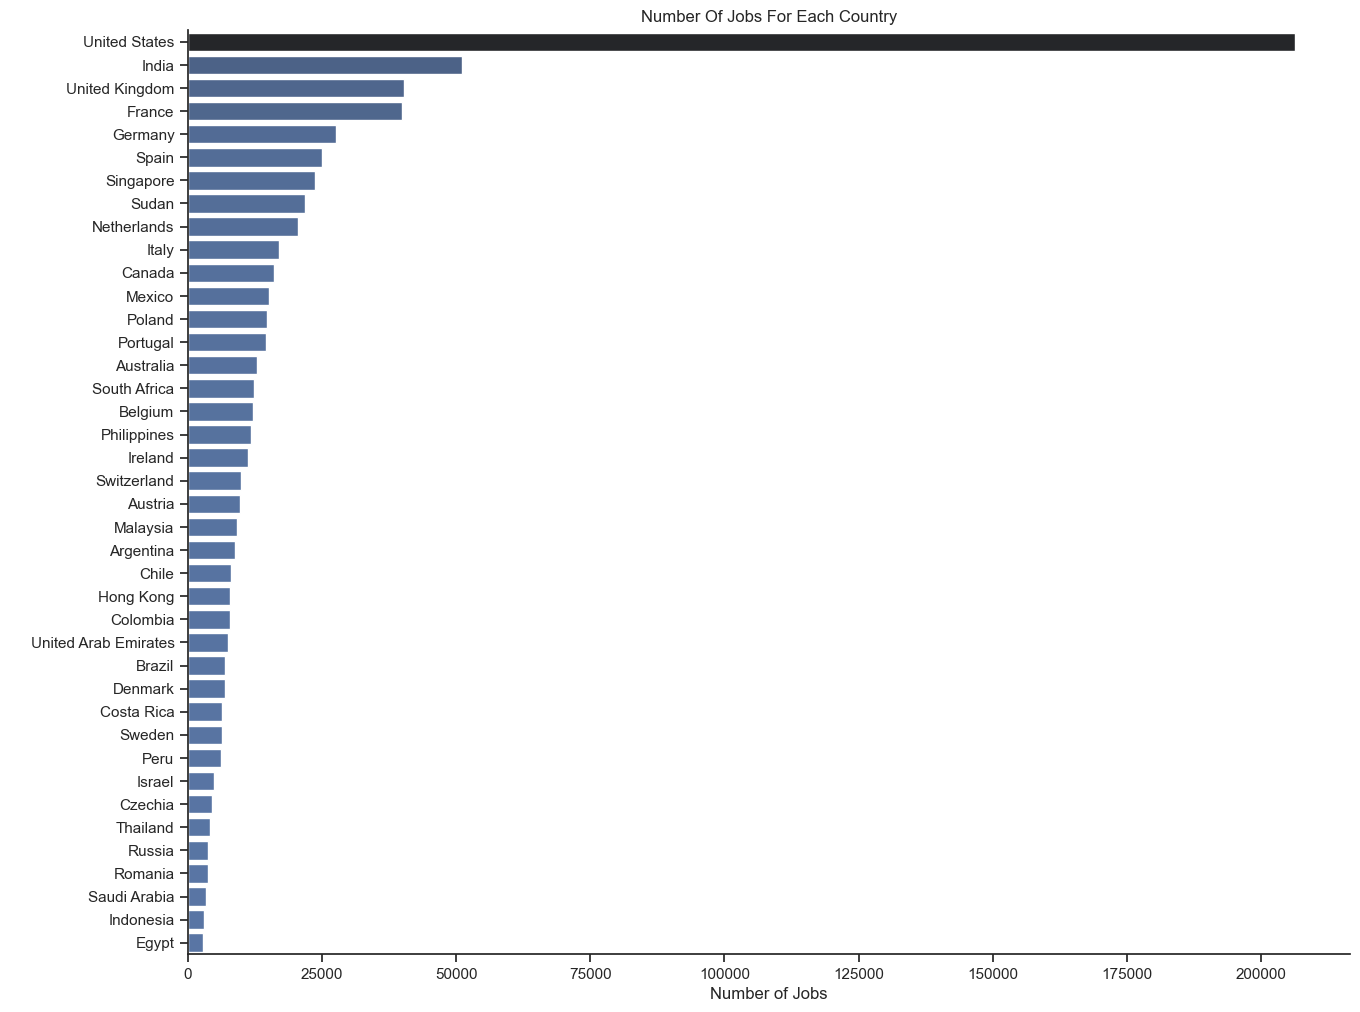

In [7]:
df_plot = df["job_country"].value_counts().to_frame().head(40)

plt.figure(figsize=(15, 12))

sns.set_theme(style="ticks")
sns.barplot(df_plot, x='count', y='job_country', hue='count', palette='dark:b_r', legend=False)
sns.despine()

plt.title("Number Of Jobs For Each Country")
plt.xlabel("Number of Jobs")
plt.ylabel(" ")
plt.show()

## Companies To Explore

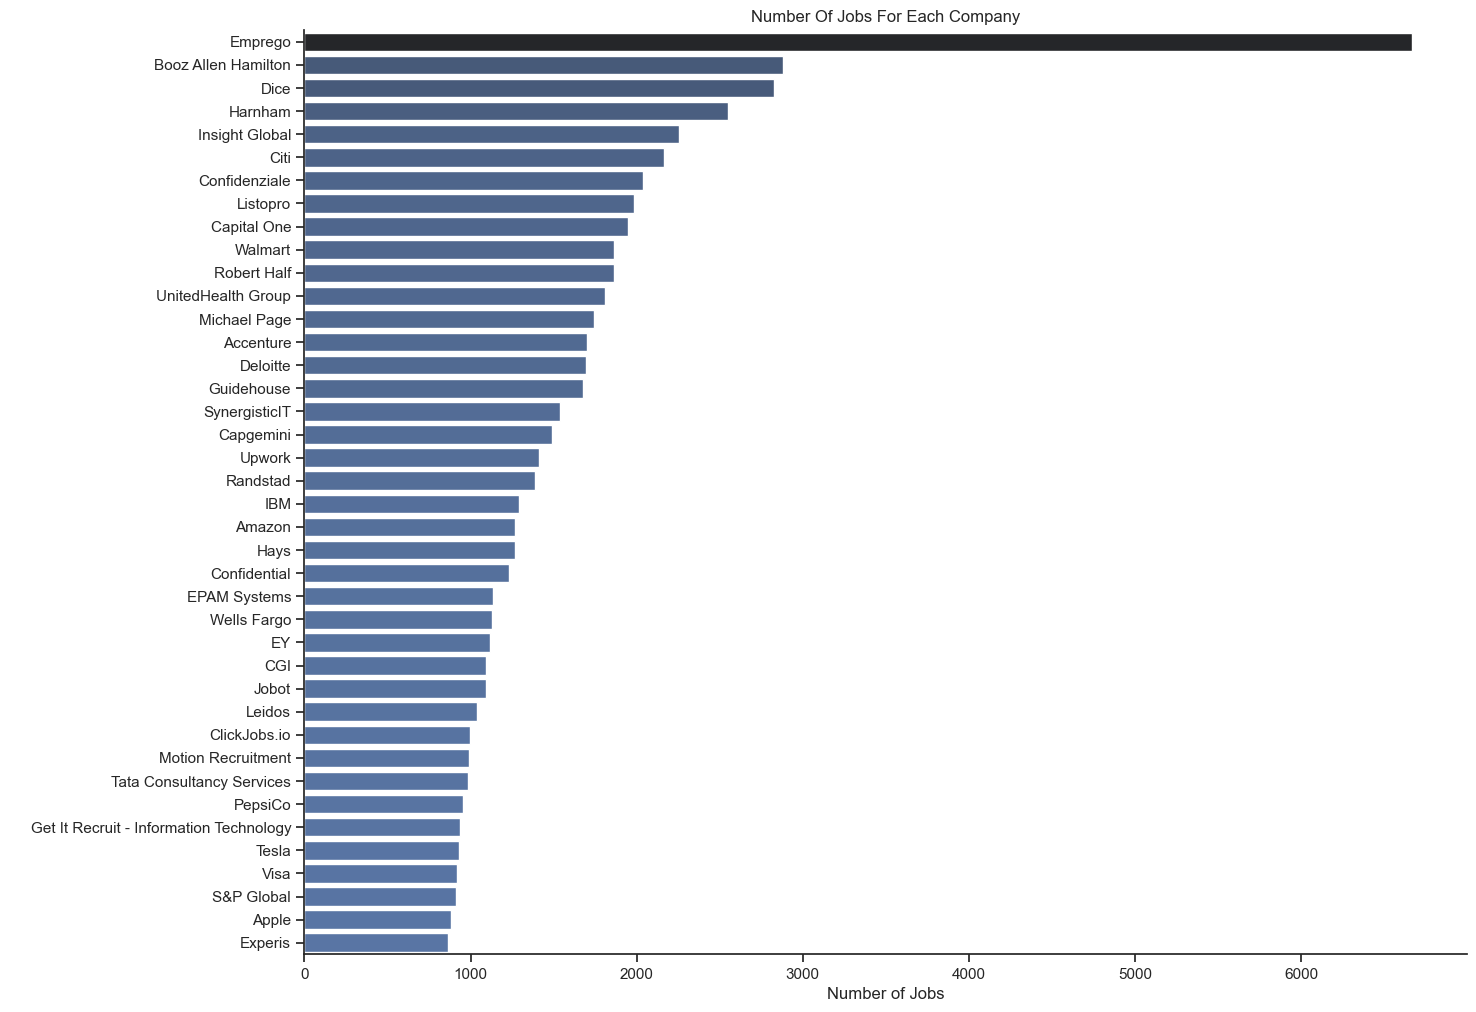

In [8]:
df_plot = df["company_name"].value_counts().to_frame().head(40)

plt.figure(figsize=(15, 12))

sns.set_theme(style="ticks")
sns.barplot(df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()

plt.title("Number Of Jobs For Each Company")
plt.xlabel("Number of Jobs")
plt.ylabel(" ")
plt.show()

## Jobs Opportunities

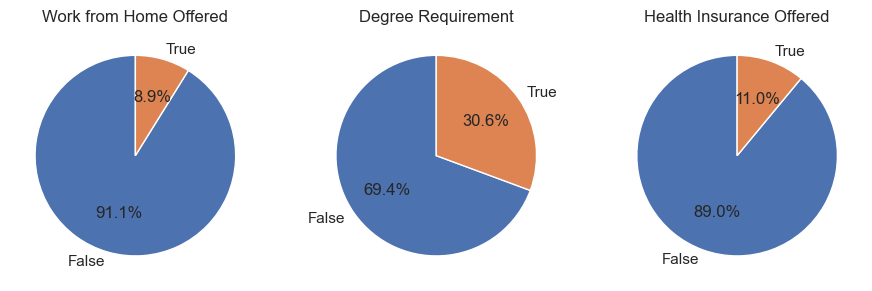

In [9]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

---

# Exploratory Data Analysis for Egypt Data Jobs

## View Data Jobs In Egypt

In [10]:
df_egypt = df[df["job_country"] == "Egypt"]
df_egypt

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
83,Software Engineer,Senior DevOps Engineer,Egypt (+1 other),via Levels.fyi,Full-time,False,Egypt,2023-11-01 13:13:36,False,False,Egypt,NaN,NaN,NaN,2U,"[bash, python, aws, linux, splunk, github, jen...","{'analyst_tools': ['splunk'], 'cloud': ['aws']..."
1320,Software Engineer,Integration Engineer,"Cairo, Egypt",via Trabajo.org,Full-time,False,Egypt,2023-07-21 13:43:21,False,False,Egypt,NaN,NaN,NaN,Ericsson,"[go, node]","{'programming': ['go'], 'webframeworks': ['nod..."
1362,Machine Learning Engineer,Machine learning engineer,Egypt,via Indeed,Full-time,False,Egypt,2023-02-28 13:39:47,False,False,Egypt,NaN,NaN,NaN,IQVIA,NaN,NaN
1567,Data Analyst,Data Analyst,Egypt,via Egypt.tanqeeb.com,Full-time,False,Egypt,2023-11-05 13:53:44,True,False,Egypt,NaN,NaN,NaN,Al Asdekaa Group for Dai,[python],{'programming': ['python']}
2981,Senior Data Analyst,Senior Data Business Analyst,Egypt,via LinkedIn,Full-time,False,Egypt,2023-12-17 13:18:00,False,False,Egypt,NaN,NaN,NaN,FlairsTech,"[sql, python, r, tableau, excel]","{'analyst_tools': ['tableau', 'excel'], 'progr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785550,Data Engineer,Data Engineer,Egypt,via Trabajo.org,Full-time,False,Egypt,2023-12-07 06:20:28,True,False,Egypt,NaN,NaN,NaN,On-Hire,NaN,NaN
785554,Senior Data Engineer,Senior Database Engineer,Egypt,via Trabajo.org,Full-time,False,Egypt,2023-12-07 06:20:28,False,False,Egypt,NaN,NaN,NaN,MigrationIT,"[sql, sql server, postgresql, mysql, oracle]","{'cloud': ['oracle'], 'databases': ['sql serve..."
785558,Business Analyst,Marketing Analyst,"Cairo, Egypt",via Trabajo.org,Full-time,False,Egypt,2023-12-07 06:20:18,False,False,Egypt,NaN,NaN,NaN,Informa Markets,"[outlook, sheets, excel, power bi, tableau, lo...","{'analyst_tools': ['outlook', 'sheets', 'excel..."
785587,Business Analyst,Business Intelligence Analyst,Egypt,via Trabajo.org,Full-time,False,Egypt,2023-12-07 06:20:16,False,False,Egypt,NaN,NaN,NaN,Ingram Micro,"[python, power bi, dax]","{'analyst_tools': ['power bi', 'dax'], 'progra..."


## Filter For Egypt Data Analyst Job Roles

In [11]:
df_DA_Egypt = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "Egypt")]
df_DA_Egypt.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1567,Data Analyst,Data Analyst,Egypt,via Egypt.tanqeeb.com,Full-time,False,Egypt,2023-11-05 13:53:44,True,False,Egypt,NaN,NaN,NaN,Al Asdekaa Group for Dai,[python],{'programming': ['python']}
2997,Data Analyst,Data Analyst,"Giza, El Omraniya, Egypt",via LinkedIn,Full-time,False,Egypt,2023-12-19 13:39:21,False,False,Egypt,NaN,NaN,NaN,Dsquares,"[python, sql, looker, power bi]","{'analyst_tools': ['looker', 'power bi'], 'pro..."
3117,Data Analyst,Digital Marketing Data Analyst,Egypt,via تنقيب مصر,Full-time,False,Egypt,2023-10-18 13:17:08,True,False,Egypt,NaN,NaN,NaN,Rashid Al Jabri Group,"[sas, sas, spss, excel]","{'analyst_tools': ['sas', 'spss', 'excel'], 'p..."
3962,Data Analyst,Data Analyst,Egypt,via LinkedIn,Full-time,False,Egypt,2023-09-09 13:16:11,False,False,Egypt,NaN,NaN,NaN,Elixir Pharma,"[elixir, sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
10424,Data Analyst,Remote Analytics and Financial Operations Manager,"6th of October City, Egypt",via Job Vacancies And Recruitment In Egypt | 3...,Full-time,False,Egypt,2023-02-21 14:03:59,True,False,Egypt,NaN,NaN,NaN,SCOPIC,NaN,NaN


## Locations To Explore In Egypt

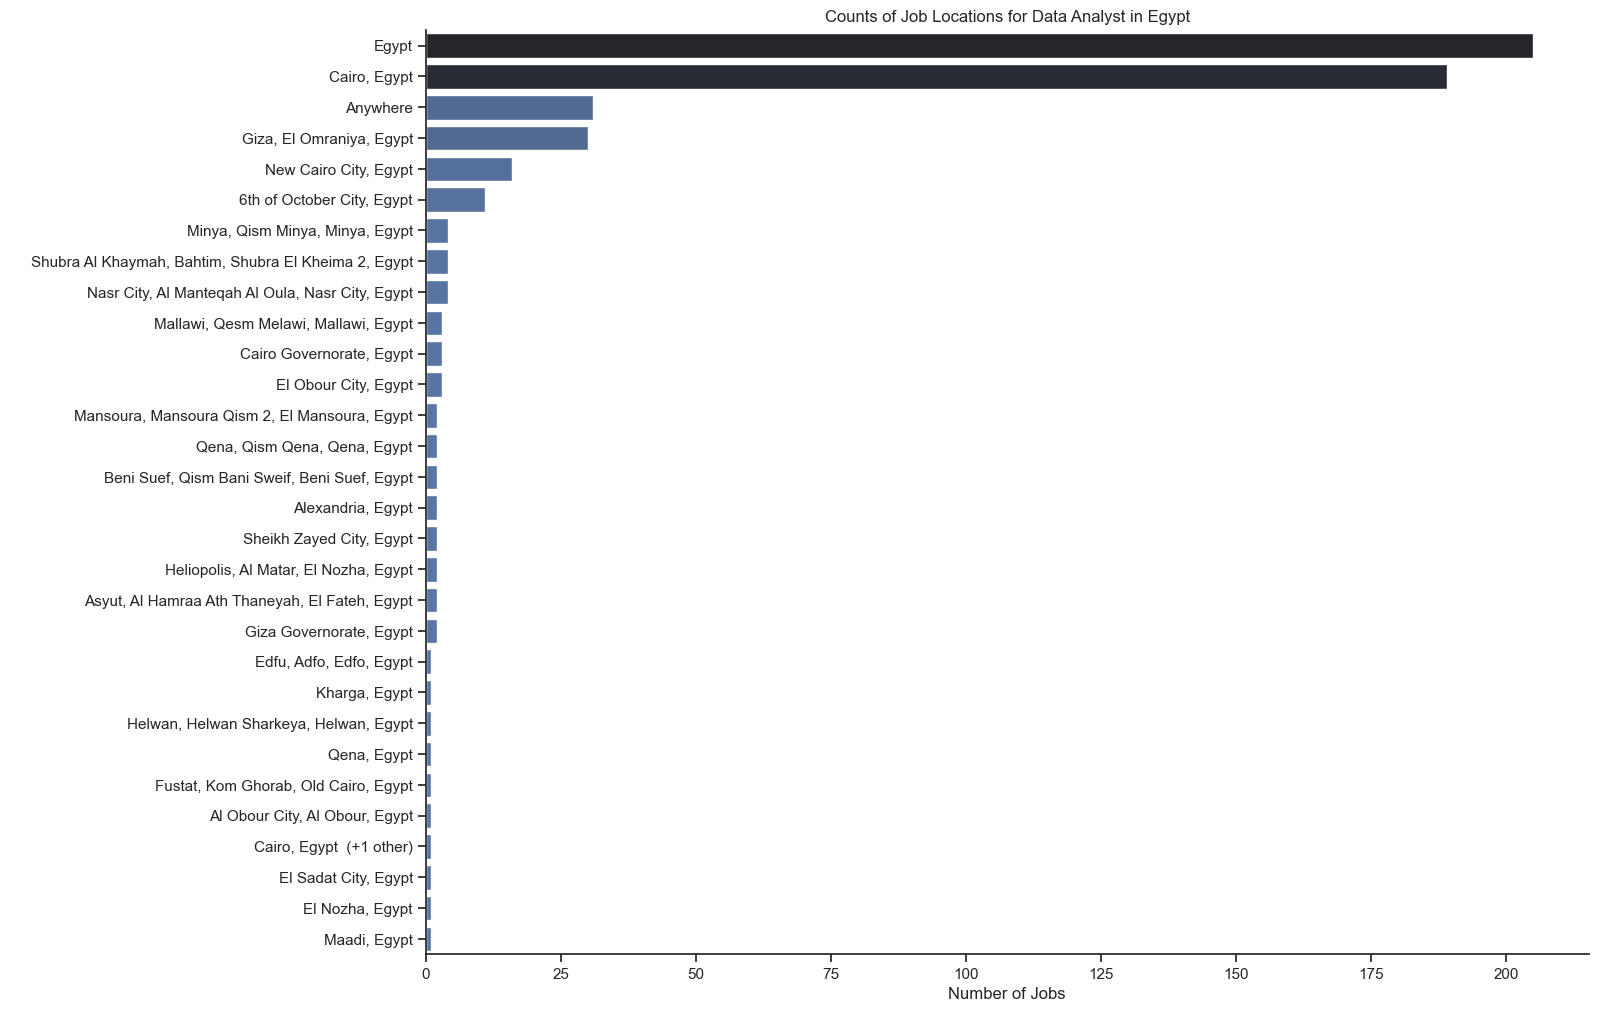

In [12]:
df_plot = df_DA_Egypt["job_location"].value_counts().to_frame().head(40)

plt.figure(figsize=(15, 12))

sns.set_theme(style="ticks")
sns.barplot(df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()

plt.title("Counts of Job Locations for Data Analyst in Egypt")
plt.xlabel("Number of Jobs")
plt.ylabel(" ")
plt.show()

## Companies To Explore

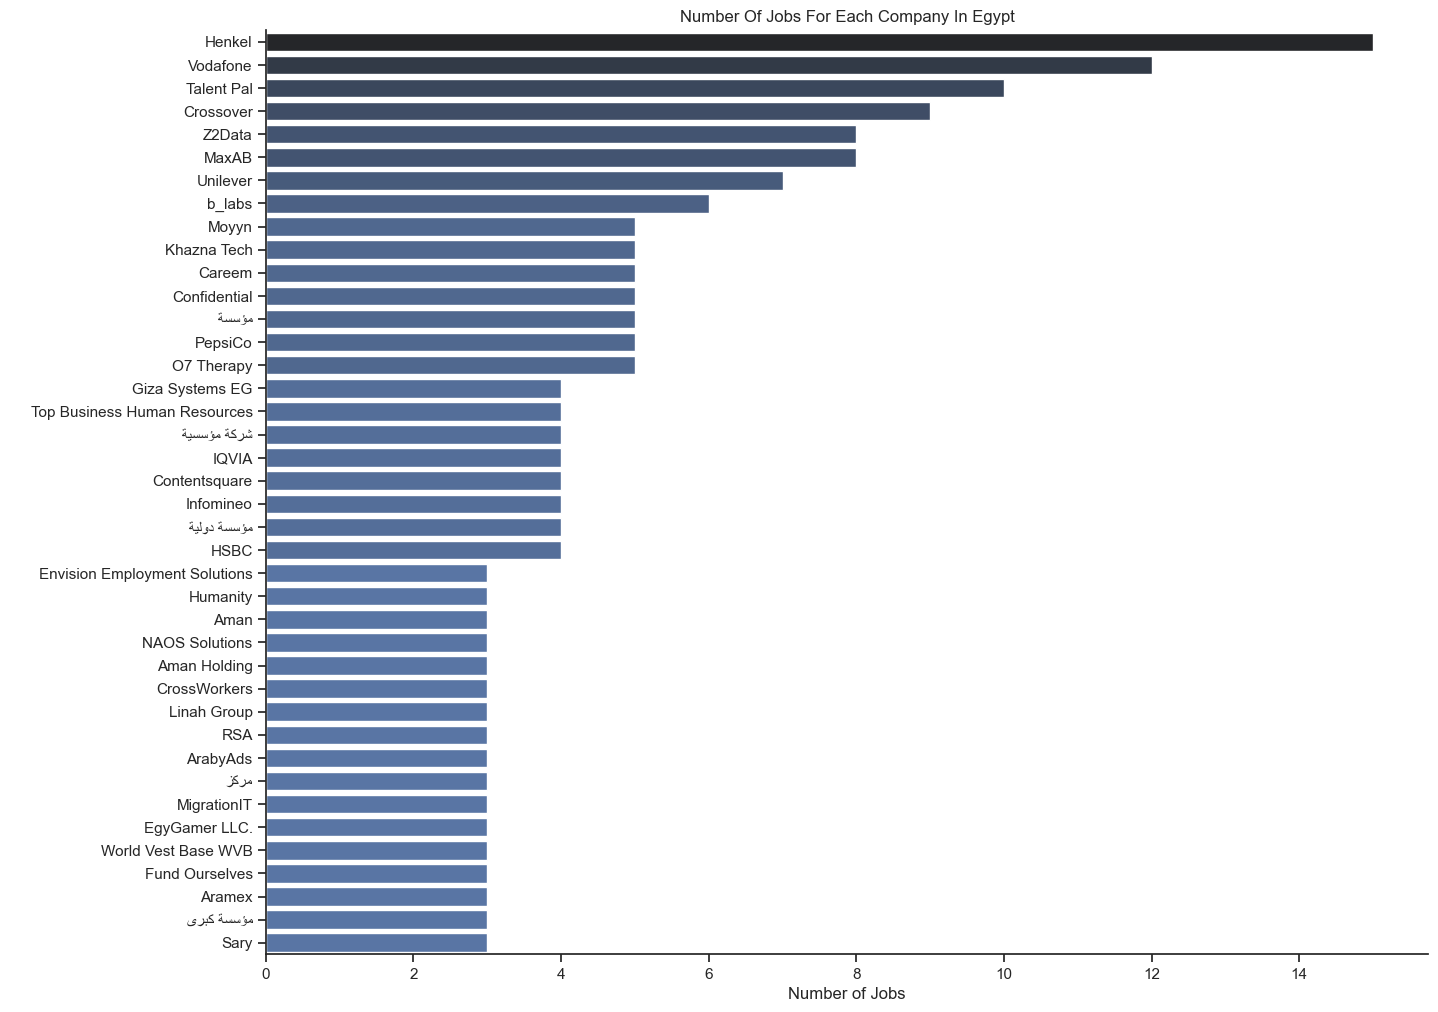

In [13]:
def fix_arabic_text(text):
    if isinstance(text, str):
        reshaped = arabic_reshaper.reshape(text)
        return get_display(reshaped)
    return text

df_plot = df_DA_Egypt["company_name"].apply(fix_arabic_text).value_counts().to_frame().head(40)

plt.figure(figsize=(15, 12))

sns.set_theme(style="ticks")
sns.barplot(df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()

plt.title("Number Of Jobs For Each Company In Egypt")
plt.xlabel("Number of Jobs")
plt.ylabel(" ")
plt.show()

## Jobs Opportunities In Egypt

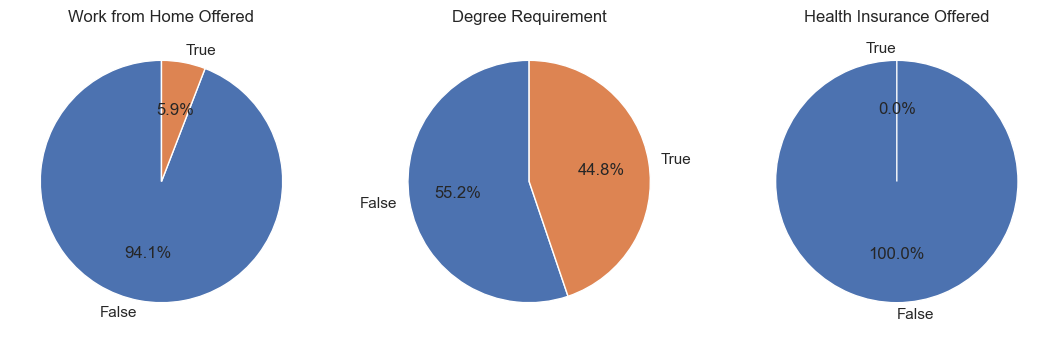

In [14]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    counts = df_DA_Egypt[column].value_counts().reindex([False, True], fill_value=0)
    ax[i].pie(counts, labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.tight_layout()
plt.show()

---